<a href="https://colab.research.google.com/github/Althaf12344/Althaf_IIITH-AI-ML/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1 Assignment answer




In [2]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [11]:
import wikipedia

topic1_en = 'Solar energy'
topic2_en = 'Wind power'

wikipedia.set_lang('en')
eng1 = wikipedia.page(topic1_en).content
eng2 = wikipedia.page(topic2_en).content

# Set French topics (correct translated titles)
topic1_fr = 'Énergie solaire'
topic2_fr = 'Énergie éolienne'

wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1_fr).content
fr2 = wikipedia.page(topic2_fr).content



This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [14]:
def clean_up(text):
    # Convert to lowercase
    text = text.lower()

    # Normalize accents (é → e)
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode()

    # Remove punctuation and digits, but keep spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [18]:
eng1 = clean_up(eng1)
eng2 = clean_up(eng2)
fr1 = clean_up(fr1)
fr2 = clean_up(fr2)

In [20]:
print(eng1)

solar energy is the radiant energy from the suns light and heat which can be harnessed using a range of technologies such as solar electricity solar thermal energy including solar water heating and solar architecture it is an essential source of renewable energy and its technologies are broadly characterized as either passive solar or active solar depending on how they capture and distribute solar energy or convert it into solar power active solar techniques include the use of photovoltaic systems concentrated solar power and solar water heating to harness the energy passive solar techniques include designing a building for better daylighting selecting materials with favorable thermal mass or lightdispersing properties and organizing spaces that naturally circulate air in the international energy agency said that the development of affordable inexhaustible and clean solar energy technologies will have huge longerterm benefits it will increase countries energy security through reliance 

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [27]:
# Convert tuple of chars to string
def tuple2string(tup):
    st = ''
    for ii in tup:
        st += ii
    return st

# Convert tuple of tuples to list of strings
def key2string(keys):
    return [tuple2string(i) for i in keys]

# Plot histogram of ngram frequencies
def plothistogram(ngram):
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    # Sort alphabetically
    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))

    plt.bar(keys, values)
    plt.xticks(rotation=90)
    plt.show()


Let us compare the histograms of English pages and French pages. Can you spot a difference?

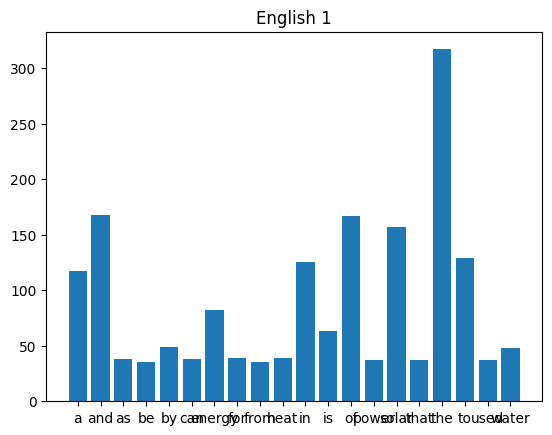

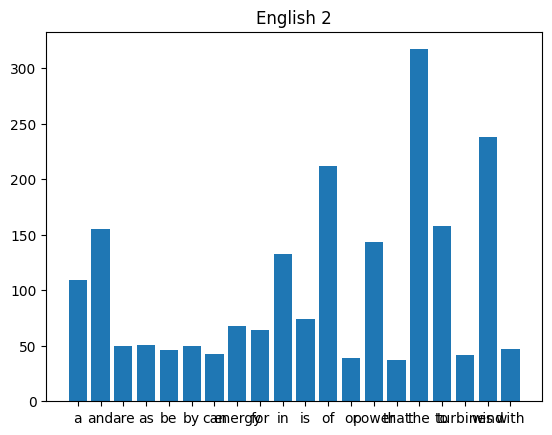

In [30]:
unigram_eng1 = Counter(ngrams(eng1.split(), 1))
plothistogram(dict(unigram_eng1.most_common(20)))
plt.title('English 1')
plt.show()

unigram_eng2 = Counter(ngrams(eng2.split(), 1))
plothistogram(dict(unigram_eng2.most_common(20)))
plt.title('English 2')
plt.show()


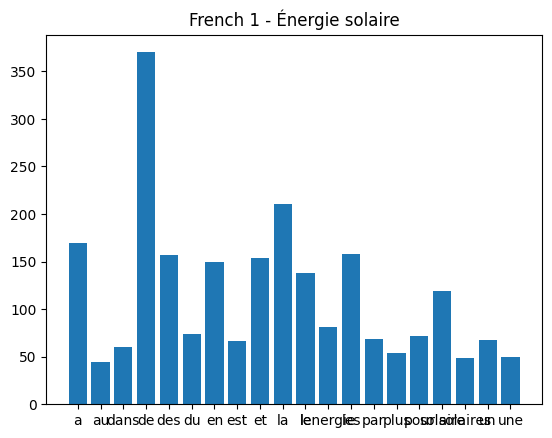

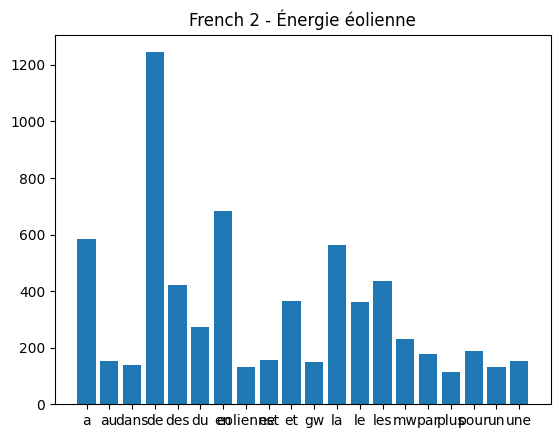

In [32]:
unigram_fr1 = Counter(ngrams(fr1.split(), 1))
plothistogram(dict(unigram_fr1.most_common(20)))
plt.title('French 1 - Énergie solaire')
plt.show()

unigram_fr2 = Counter(ngrams(fr2.split(), 1))
plothistogram(dict(unigram_fr2.most_common(20)))
plt.title('French 2 - Énergie éolienne')
plt.show()


We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

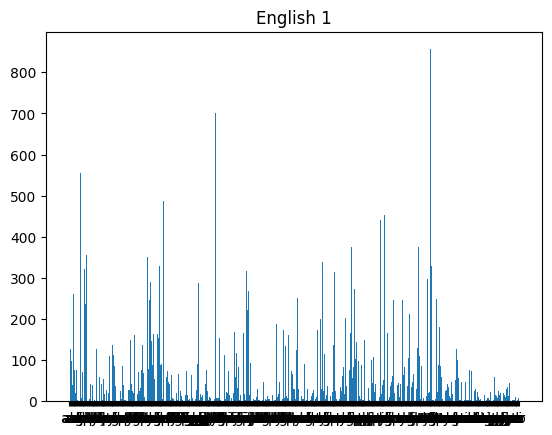

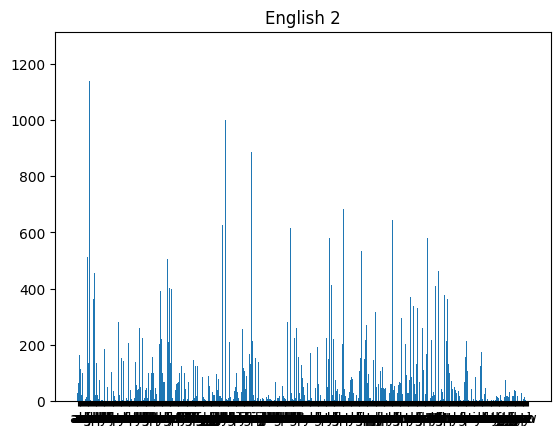

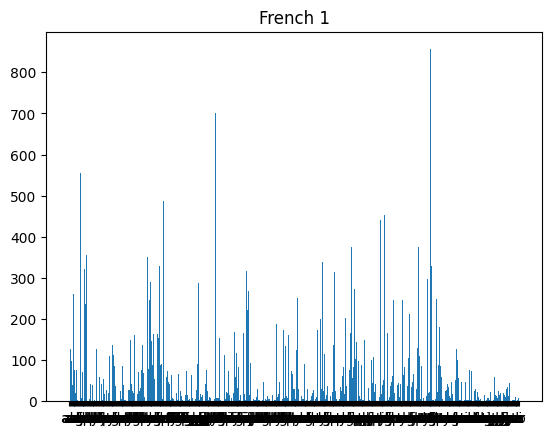

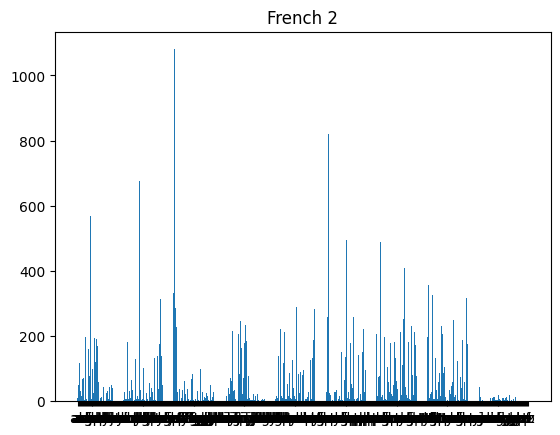

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

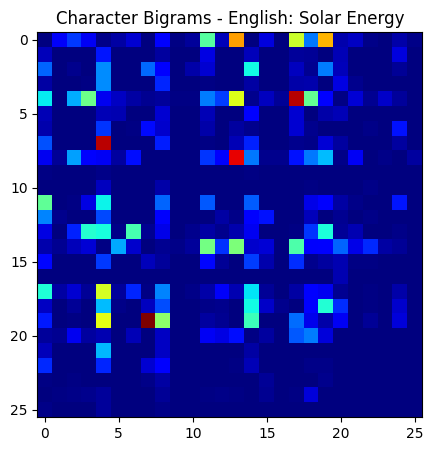

In [35]:
def plotbihistogram(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            bigram = (chr(ord('a') + ii), chr(ord('a') + jj))
            freq[ii, jj] = ngram[bigram]
    plt.imshow(freq, cmap='jet')
    return freq
# Step 3: Plot bihistograms
plt.figure(figsize=(6, 5))
plotbihistogram(char_bigrams_eng1)
plt.title('Character Bigrams - English: Solar Energy')
plt.show()



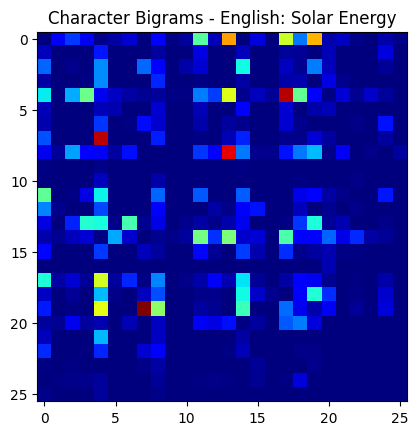

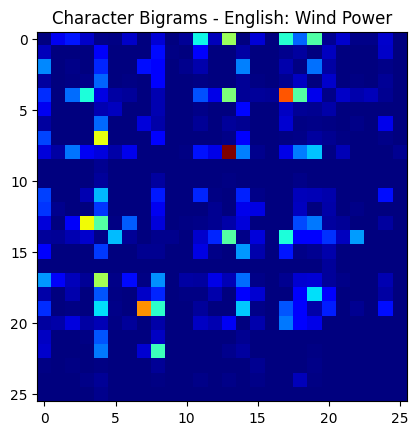

In [37]:
# Character bigrams for Solar Energy and Wind Power
char_bigrams_eng1 = Counter(ngrams(clean_up(eng1), 2))
char_bigrams_eng2 = Counter(ngrams(clean_up(eng2), 2))

# Bihistogram plots
bieng1 = plotbihistogram(char_bigrams_eng1)
plt.title('Character Bigrams - English: Solar Energy')
plt.show()

bieng2 = plotbihistogram(char_bigrams_eng2)
plt.title('Character Bigrams - English: Wind Power')
plt.show()


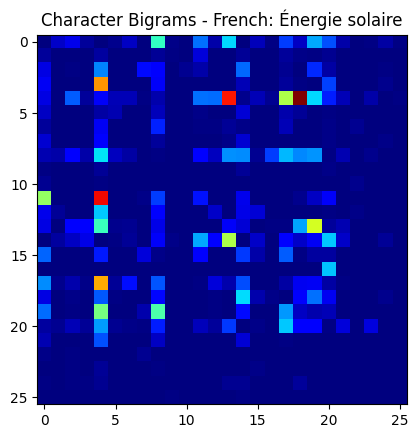

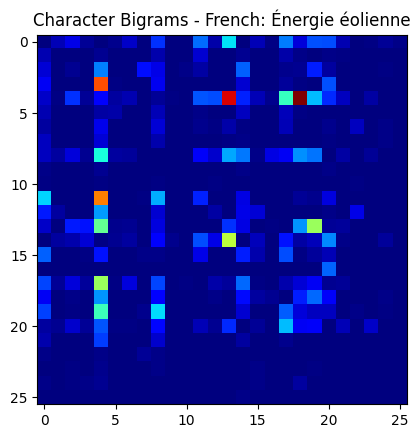

In [39]:
# Character bigrams for French Solar and Wind
char_bigrams_fr1 = Counter(ngrams(clean_up(fr1), 2))
char_bigrams_fr2 = Counter(ngrams(clean_up(fr2), 2))

# Bihistogram plots
bifr1 = plotbihistogram(char_bigrams_fr1)
plt.title('Character Bigrams - French: Énergie solaire')
plt.show()

bifr2 = plotbihistogram(char_bigrams_fr2)
plt.title('Character Bigrams - French: Énergie éolienne')
plt.show()


Let us look at the top 10 ngrams for each text.

In [41]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [42]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 611.0
('e', 'r') : 582.0
('h', 'e') : 579.0
('i', 'n') : 555.0
('a', 'n') : 453.0
('a', 't') : 438.0
('t', 'e') : 382.0
('e', 'n') : 378.0
('r', 'e') : 371.0
('a', 'r') : 364.0

English 2:
('i', 'n') : 799.0
('e', 'r') : 653.0
('t', 'h') : 604.0
('n', 'd') : 514.0
('h', 'e') : 503.0
('r', 'e') : 438.0
('a', 'n') : 429.0
('e', 'n') : 401.0
('o', 'n') : 361.0
('n', 'e') : 361.0

French 1:
('e', 's') : 1062.0
('l', 'e') : 957.0
('e', 'n') : 941.0
('d', 'e') : 800.0
('r', 'e') : 775.0
('n', 't') : 645.0
('e', 'r') : 595.0
('o', 'n') : 594.0
('l', 'a') : 564.0
('t', 'e') : 525.0

French 2:
('e', 's') : 2913.0
('e', 'n') : 2682.0
('d', 'e') : 2403.0
('l', 'e') : 2263.0
('o', 'n') : 1682.0
('n', 't') : 1561.0
('r', 'e') : 1559.0
('n', 'e') : 1374.0
('t', 'e') : 1239.0
('e', 'r') : 1214.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [1]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [2]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

In [8]:

# This cell should be executed first to define the character bigrams
# Character bigrams for Solar Energy and Wind Power
char_bigrams_eng1 = Counter(ngrams(clean_up(eng1), 2))
char_bigrams_eng2 = Counter(ngrams(clean_up(eng2), 2))

# Character bigrams for French Solar and Wind
char_bigrams_fr1 = Counter(ngrams(clean_up(fr1), 2))
char_bigrams_fr2 = Counter(ngrams(clean_up(fr2), 2))

# This cell should be executed second to calculate the bihistogram frequencies and assign them to variables
# Bihistogram plots
bieng1 = plotbihistogram(char_bigrams_eng1)
plt.title('Character Bigrams - English: Solar Energy')
plt.show()

bieng2 = plotbihistogram(char_bigrams_eng2)
plt.title('Character Bigrams - English: Wind Power')
plt.show()

bifr1 = plotbihistogram(char_bigrams_fr1)
plt.title('Character Bigrams - French: Énergie solaire')
plt.show()

bifr2 = plotbihistogram(char_bigrams_fr2)
plt.title('Character Bigrams - French: Énergie éolienne')
plt.show()
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.imshow(bieng1, cmap='jet')
plt.title("English: Solar Energy")

plt.subplot(1, 4, 2)
plt.imshow(bieng2, cmap='jet')
plt.title("English: Wind Power")

plt.subplot(1, 4, 3)
plt.imshow(bifr1, cmap='jet')
plt.title("French: Énergie solaire")

plt.subplot(1, 4, 4)
plt.imshow(bifr2, cmap='jet')
plt.title("French: Énergie éolienne")

plt.tight_layout()
plt.show()


NameError: name 'Counter' is not defined

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [13]:
import numpy as np

sum_solar = np.sum(no1 > 0, axis=(1, 2))

# Count number of non-zero bigram cells in each of the 5 Wind Power matrices
sum_wind = np.sum(no0 > 0, axis=(1, 2))


Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

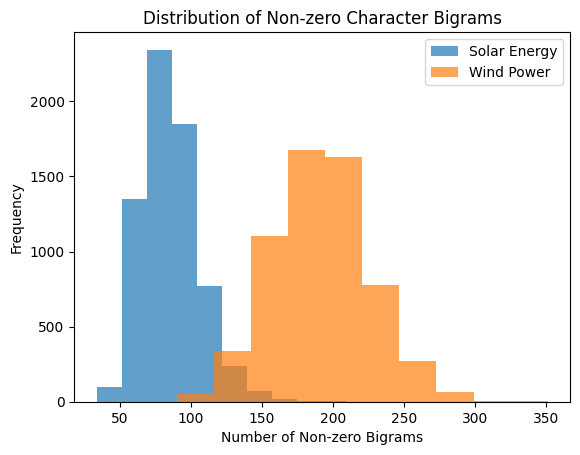

In [15]:
plt.hist(sum_solar, alpha=0.7, label='Solar Energy')
plt.hist(sum_wind, alpha=0.7, label='Wind Power')
plt.xlabel('Number of Non-zero Bigrams')
plt.ylabel('Frequency')
plt.title('Distribution of Non-zero Character Bigrams')
plt.legend()
plt.show()


We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [17]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

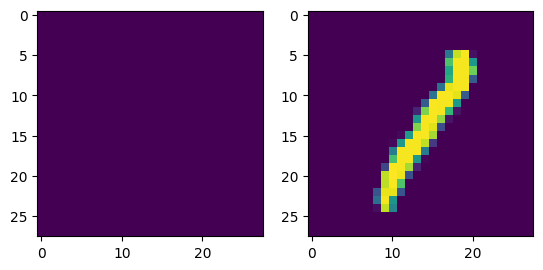

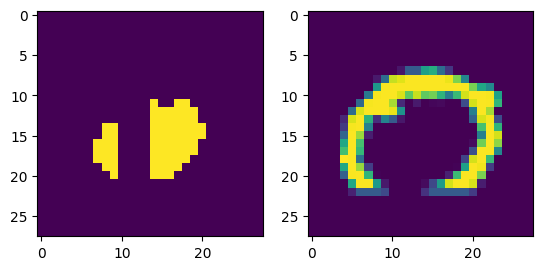

In [18]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

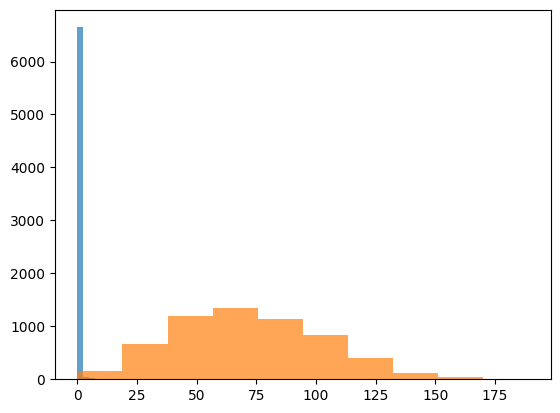

In [19]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [20]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

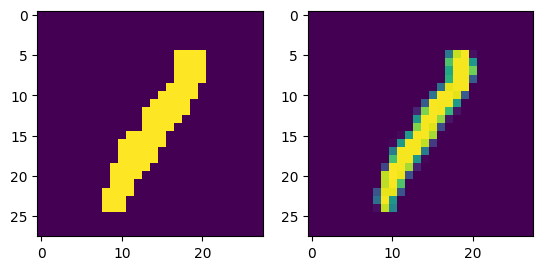

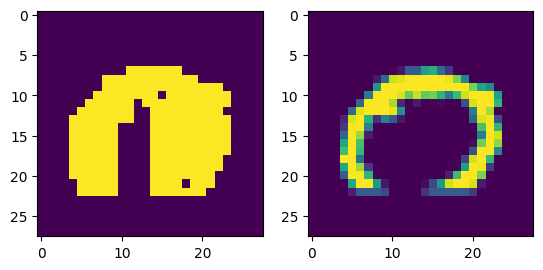

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

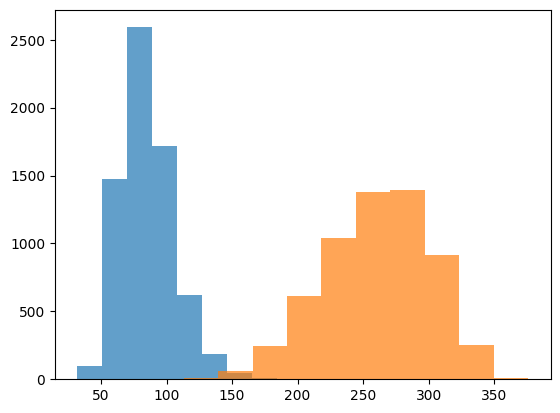

In [21]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [25]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

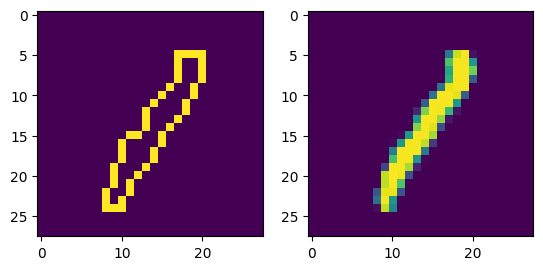

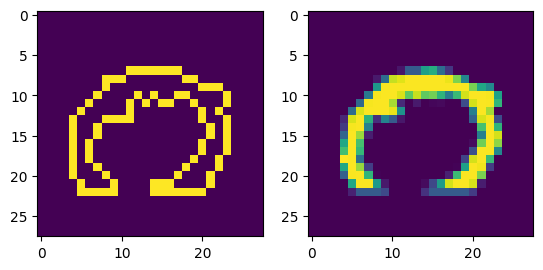

In [26]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

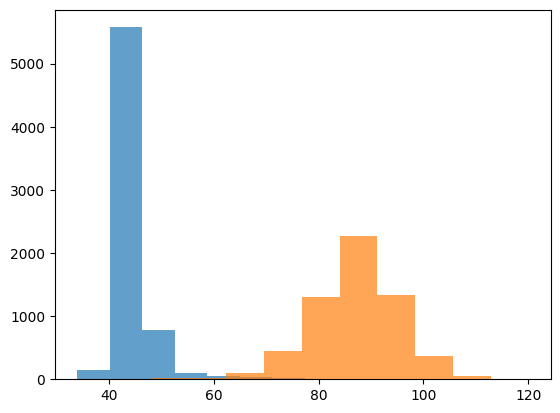

In [29]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

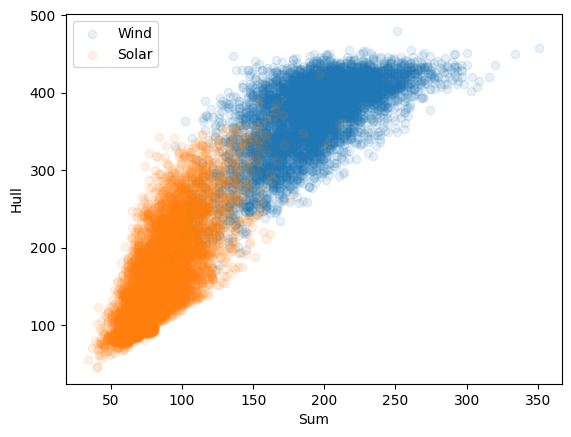

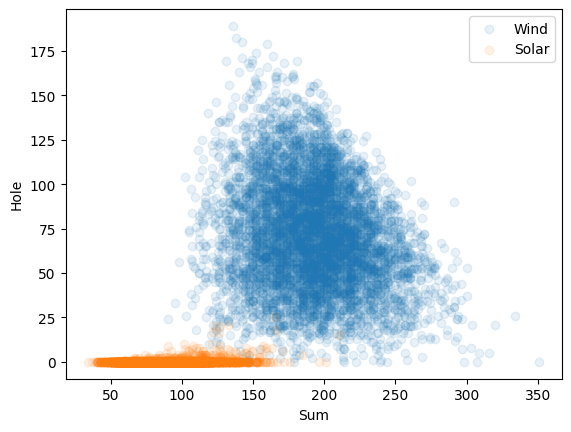

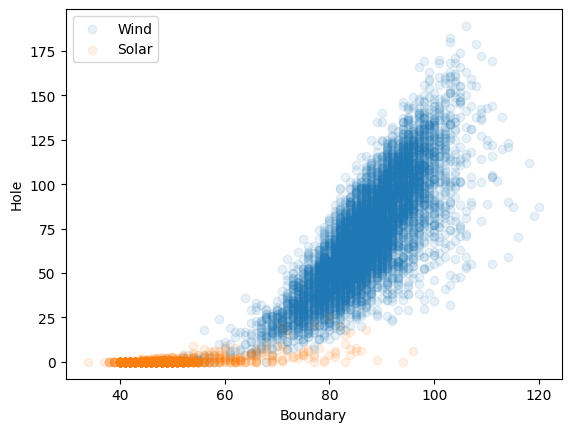

In [31]:
# Calculate sum variables (number of pixels > 0 per image)
sum1 = np.sum(no1 > 0, axis=(1,2))  # For solar dataset (class 1)
sum0 = np.sum(no0 > 0, axis=(1,2))  # For wind dataset (class 0)

# Calculate hull variables using cumArray function you gave before
hull1 = np.array([np.sum(cumArray(img)) for img in no1])  # solar hull sums
hull0 = np.array([np.sum(cumArray(img)) for img in no0])  # wind hull sums

# Calculate hole variables using getHolePixels function you gave before
hole1 = np.array([np.sum(getHolePixels(img)) for img in no1])  # solar holes
hole0 = np.array([np.sum(getHolePixels(img)) for img in no0])  # wind holes

# Calculate boundary variables using getBoundaryPixels (assuming you have it defined)
bound1 = np.array([np.sum(getBoundaryPixels(img)) for img in no1])  # solar boundary
bound0 = np.array([np.sum(getBoundaryPixels(img)) for img in no0])  # wind boundary

# Now plot

import matplotlib.pyplot as plt

# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['Wind', 'Solar'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hole')
plt.legend(['Wind', 'Solar'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary')
plt.ylabel('Hole')
plt.legend(['Wind', 'Solar'])
plt.show()



Now let us try plotting 3 features together.

In [32]:
import pandas as pd
import plotly.express as px
import numpy as np

# Assuming these arrays are already computed for your solar and wind data:
# hole0, hole1, sum0, sum1, bound0, bound1

# Use correct concatenations: hole0 with hole1, sum0 with sum1, bound0 with bound1
cl1 = ['Solar'] * len(sum1)
cl0 = ['Wind'] * len(sum0)

df = pd.DataFrame(list(zip(np.concatenate((hole0, hole1)),   # holes: wind + solar
                           np.concatenate((sum0, sum1)),     # sums: wind + solar
                           np.concatenate((bound0, bound1)), # boundaries: wind + solar
                           np.concatenate((cl0, cl1))         # classes: wind + solar
                          )),
                  columns=['Hole', 'Sum', 'Boundary', 'Class'])

print(df.head())

fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()


   Hole  Sum  Boundary Class
0    72  176        87  Wind
1    65  198        88  Wind
2    23  183        77  Wind
3    24  200        73  Wind
4    74  234        93  Wind


Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

ANSWERS:

1) The best features are the ones that help you tell solar and wind data apart easily. You can check this by plotting the features against each other or by trying a simple machine learning model (like logistic regression) and seeing which features give the best accuracy.



2)   If we have 4 features, we can:

Make scatter plots for each pair of features (called a pairplot) to see how they relate.


Use a 3D scatter plot for 3 features and show the 4th one by color or size.

Use special tools like PCA to reduce many features into 2D or 3D so you can visualize them better.


3)     Yes! we can think of new features based on what the data looks like:

1) Count how many edges or shapes are in the image.

2) Calculate the average brightness or how much it varies.

3) Look at patterns or textures.

For solar/wind data, maybe use things like average power output or how much power changes during the day.

4) Maybe, but not always. Features that help separate just two classes might not work well if you add more classes. You might need to find new features or combine them differently when you have more types of data.

5) It gets harder to separate classes because the data can overlap more. Visualizing also becomes harder because plots get crowded. You might need better or more features, and smarter models that can handle multiple classes.